In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
v0=1000.
g=10.
th=45*np.pi/180.
m=1.

In [3]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2
def calc_x1_coord2(v0,th,g,t):
    return v0*t-0.5*g*sin(th)*t**2
def calc_x2_coord2(v0,th,g,t):
    return -0.5*g*cos(th)*t**2

## Coordinate #1

156.27813906953475


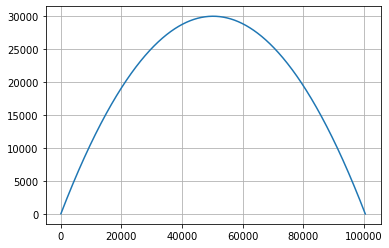

In [11]:
t=np.linspace(0,200,2000)
x1=calc_x1_coord1(v0,th,g,t)
x2=calc_x2_coord1(v0,th,g,t)

ind=x2>0
x1=x1[ind]
x2=x2[ind]
print(t[ind][-1])
grid()
plot(x1,x2)

## Coordiante #2

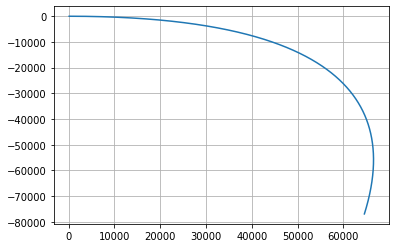

In [12]:
x1_2=calc_x1_coord2(v0,th,g,t)
x2_2=calc_x2_coord2(v0,th,g,t)

x1_2=x1_2[ind]
x2_2=x2_2[ind]

grid()
plot(x1_2,x2_2)
#plot(x1*rot,x2*rot)

## Checking

In [13]:
#th=-th
rot=np.array([[cos(-th),sin(-th)],
[-sin(-th),cos(-th)]])

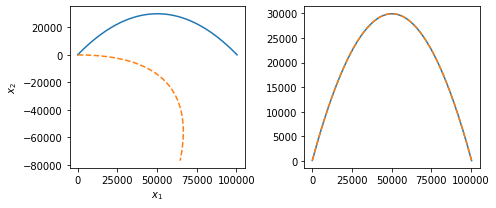

In [14]:
fig=plt.figure(figsize=(7,3))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.plot(x1,x2)
ax1.plot(x1_2,x2_2,'--')

xs=np.array([x1_2,x2_2]).T
xnew=np.zeros(xs.shape)
for i in range(len(xs)):
    xold=xs[i,:]
    xnew[i,:]=np.dot(rot,xold)
    
ax2.plot(xnew[:,0],xnew[:,1],label='')
ax2.plot(x1,x2,'--',label='overlapped')

ax1.set_xlabel(r'$x_1$')
ax1.set_ylabel(r'$x_2$')

fig.tight_layout()
fig.savefig('two_results.png',dpi=400)
fig.savefig('two_results.pdf')

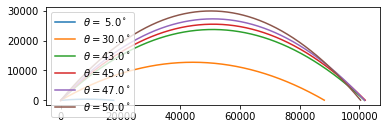

In [144]:
def calc_x1_coord1(v0,th,g,t):
    return v0*cos(th)*t
def calc_x2_coord1(v0,th,g,t):
    return v0*sin(th)*t-0.5*g*t**2


ths=[5,30,43,45,47,50]
v0=1000.
g=9.8
for th in ths:
    th=th*np.pi/180.


    t=np.linspace(0,1400,10000)
    x1=calc_x1_coord1(v0,th,g,t)
    x2=calc_x2_coord1(v0,th,g,t)

    ind=x2>-0.1
    x1=x1[ind]
    x2=x2[ind]
    grid()
    plot(x1,x2,label=r'$\theta=$%4.1f$^\circ$'%(th*180/np.pi))
    
gca().legend(loc='upper left')
gca().set_aspect('equal')
#gca().set_xscale('log')

- Considering the drag force of fluid

$F=1/2 \rho v^2 C_D A$
The above is rather compilicated. For brevity, let's say we follow $F_i=kv_i$

In [98]:
def calc_v1(v0,th,g,t,k,m):
    return v0*cos(th)*exp(-k/m*t)
def calc_v2(v0,th,g,t,k,m):
    return -m/k*g+(v0*sin(th)+m/k*g)*exp(-k/m*t)

In [146]:
def calc_x1(v0,th,g,t,k,m):
    return v0*cos(th)*(-m/k*exp(-k/m*t)+m/k)
def calc_x2(v0,th,g,t,k,m):
    return -m/k*g*t+(v0*sin(th)+m/k*g)*(-m/k)*(exp(-k/m*t)-1.)

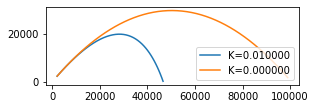

In [159]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(121)
#ax2=fig.add_subplot(122)

t=np.linspace(0,154)
k=1e-2
x1=calc_x1(v0,th,g,t,k,m)
x2=calc_x2(v0,th,g,t,k,m)


ind=x2>0.
x1=x1[ind]
x2=x2[ind]
ax.plot(x1,x2,'-',label='K=%f'%k)

k=0.0000001
x1=calc_x1(v0,th,g,t,k,m)
x2=calc_x2(v0,th,g,t,k,m)
ind=x2>0.
x1=x1[ind]
x2=x2[ind]
ax.plot(x1,x2,'-',label='K=%f'%k)

ax.legend()
ax.set_aspect('equal')

dum="""
t=np.linspace(0,200)
v1=calc_v1(v0,th,g,t,k,m)
v2=calc_v2(v0,th,g,t,k,m)
t=t[ind]
v1=v1[ind]
v2=v2[ind]
plot(t,v1)
plot(t,v2)
"""

th: 0.3490658503988659
th: 0.5235987755982988
th: 0.6981317007977318
th: 0.7853981633974483
th: 0.8726646259971648


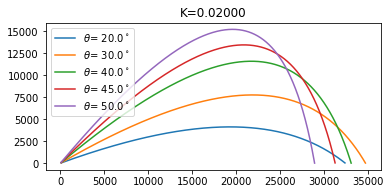

In [162]:
fig=plt.figure()
ax=fig.add_subplot(111)

t=np.linspace(0,1000,10000)

k=2e-2

ths=[20,30,40,45,50]
ths=np.array(ths)*np.pi/180.

ax.set_title(r'K=%7.5f'%k)

for th in ths:
    print('th:',th)
    x1=calc_x1(v0,th,g,t,k,m)
    x2=calc_x2(v0,th,g,t,k,m)
    ind=x2>0.
    x1=x1[ind]
    x2=x2[ind]
    ax.plot(x1,x2,'-',label=r'$\theta$=%5.1f$^\circ$'%(th*180/np.pi))

    ax.legend()
    ax.set_aspect('equal')
fig.savefig('dumm.pdf')